In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimag

In [4]:
img1=mpimag.imread('4.2.05.tiff')


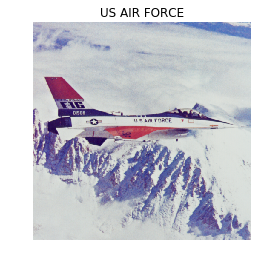

In [5]:
plt.axis('off')
plt.imshow(img1)
plt.title('US AIR FORCE')
plt.show()

In [7]:
plt.imsave('US AIR FORCE.png',img1)

# NUMPY OPERATIONS FOR IMAGE PROCESSING

In [6]:
imga=mpimag.imread('4.1.06.tiff')
imgb=mpimag.imread('5.3.01.tiff')

In [7]:
print(imga)

[[[233   0 246]
  [202 217 221]
  [205 218 220]
  ...
  [233 229 227]
  [235 229 227]
  [239 229 226]]

 [[230 217 237]
  [203 217 221]
  [206 217 220]
  ...
  [232 227 227]
  [234 227 225]
  [235 229 228]]

 [[230 217 236]
  [200 217 221]
  [200 216 220]
  ...
  [232 228 227]
  [233 228 227]
  [235 229 226]]

 ...

 [[ 48  43  97]
  [ 81  58  70]
  [ 84  43  76]
  ...
  [ 75  40  72]
  [ 68  34  72]
  [ 84  40  81]]

 [[ 64  58  94]
  [155 155 135]
  [115  99  89]
  ...
  [ 81  51  84]
  [ 83  45  74]
  [ 85  55  80]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [8]:
print(imgb)

[[130 138 140 ... 115 113 111]
 [139 134 131 ... 110 117 116]
 [141 127 131 ... 109 108 107]
 ...
 [102 103 103 ...  76  80  89]
 [106 102 109 ...  72  69  82]
 [ 98 105 116 ...  85  81  89]]


In [10]:
print(type(imga))
print(imga.shape)
print(imga.ndim)
print(imga.size)
print(imga.dtype)
print(imga.nbytes)

<class 'numpy.ndarray'>
(256, 256, 3)
3
196608
uint8
196608


In [11]:
print(type(imgb))
print(imgb.shape)
print(imgb.ndim)
print(imgb.size)
print(imgb.dtype)
print(imgb.nbytes)

<class 'numpy.ndarray'>
(1024, 1024)
2
1048576
uint8
1048576


In [15]:
# Value of Pixel Located at any position
print(imga[11,11,0])
print(imga[11,11,1])
print(imga[11,11,1])
print(imga[11,11,:])

205
217
217
[205 217 221]


In [18]:
print(imgb[11,0])
print(imgb[11,1])
print(imgb[11,1])
print(imgb[11,:])

148
148
148
[148 148 143 ...  99 106 107]


# IMAGE STATISTICS

In [20]:
print(imga.min())
print(imga.max())
print(imga.mean())

0
249
133.4556427001953


In [22]:
print(np.median(imga))
print(np.mean(imga))
print(np.average(imga))
print(np.std(imga))
print(np.var(imga))

129.0
133.4556427001953
133.4556427001953
66.57266973031125
4431.9203550211


# MASKING OF AN IMAGE INTO DESIRED SHAPES

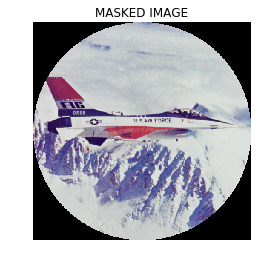

In [27]:
# MASKING THE IMAGE INTO A CIRCULAR SHAPE

nrows,ncols,channels=img1.shape
row,col=np.ogrid[:nrows,:ncols]
cnt_row,cnt_col=nrows/2,ncols/2
outer_disk_mask=((row-cnt_row)**2+(col-cnt_col)**2 > (nrows/2)**2)
img1.setflags(write=1)
img1[outer_disk_mask]=0
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.title('MASKED IMAGE')
plt.show()

# IMAGE CHANNELS

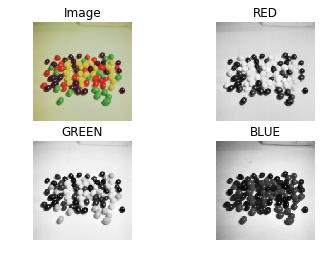

In [32]:
# SEPERATION AND PROCESSING OF IMAGE CHANNELS
img3=mpimag.imread('4.1.08.tiff')
r=img3[:,:,0]
g=img3[:,:,1]
b=img3[:,:,2]

output=[img3,r,g,b]
titles=['Image','RED','GREEN','BLUE']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(titles[i])
    if i==0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i],cmap='gray')
plt.show()

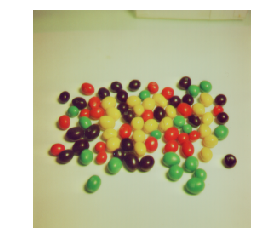

In [35]:
# Combining Colour Channels

r=img3[:,:,0]
g=img3[:,:,1]
b=img3[:,:,2]

output=np.dstack((r,g,b))
plt.axis('off')
plt.imshow(output)
plt.show()

# ARITHMETIC OPERATIONS

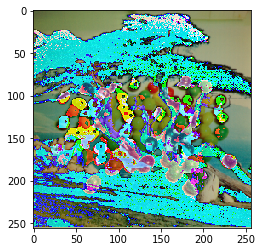

In [38]:
plt.imshow(imga+img3)
plt.show()

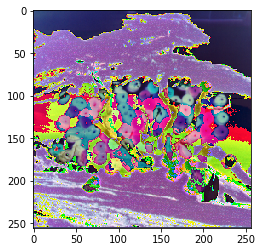

In [39]:
plt.imshow(imga-img3)
plt.show()

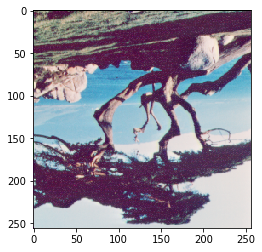

In [44]:
plt.imshow(np.flip(imga,0))
plt.show()

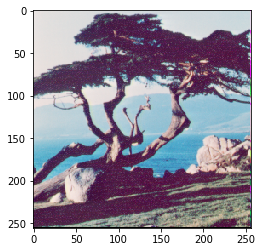

In [45]:
plt.imshow(np.flip(imga,1))
plt.show()

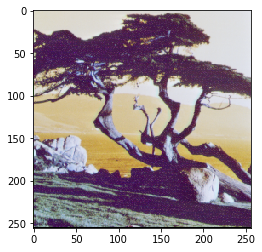

In [46]:
plt.imshow(np.flip(imga,2))
plt.show()

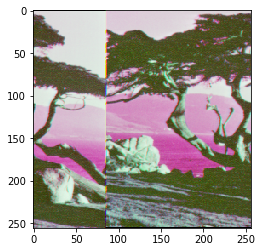

In [47]:
plt.imshow(np.roll(imga,256))
plt.show()

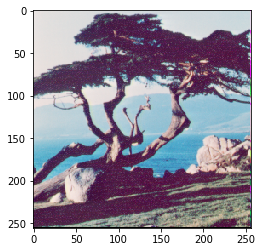

In [48]:
plt.imshow(np.fliplr(imga))
plt.show()

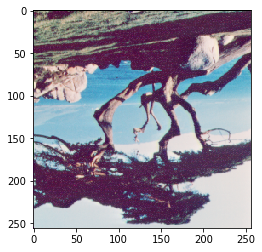

In [51]:
plt.imshow(np.flipud(imga))
plt.show()

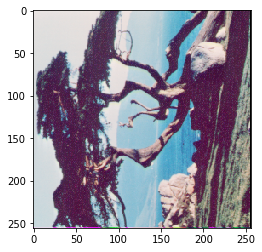

In [50]:
plt.imshow(np.rot90(imga))
plt.show()

# LOGICAL OPERATIONS 

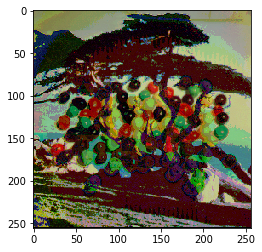

In [52]:
plt.imshow(np.bitwise_and(imga,img3))
plt.show()

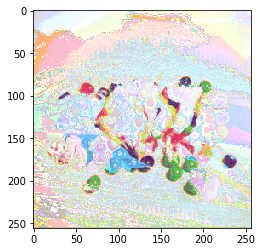

In [53]:
plt.imshow(np.bitwise_or(imga,img3))
plt.show()

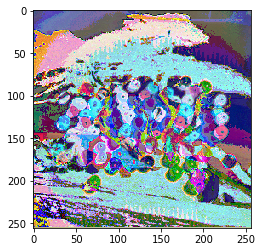

In [54]:
plt.imshow(np.bitwise_xor(imga,img3))
plt.show()

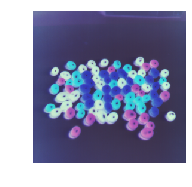

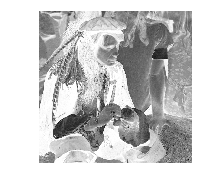

In [63]:
plt.subplot(1,2,1)
plt.imshow(np.bitwise_not(img3))
plt.axis('off')
plt.show()
plt.subplot(1,2,2)
plt.imshow(np.bitwise_not(imgb),cmap='gray')
plt.axis('off')
plt.show()

# IMAGE HISTOGRAM WITH NUMPY AND MATPLOTLIB

In [64]:
r=img3[:,:,0]
g=img3[:,:,1]
b=img3[:,:,2]

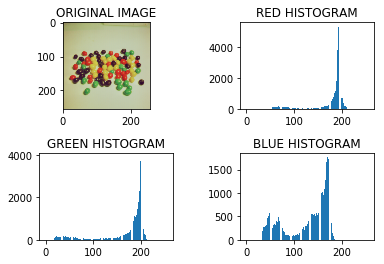

In [69]:
#HISTOGRAM USING NUMPY
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.title('ORIGINAL IMAGE')
plt.imshow(img3)
hist,bins=np.histogram(r.ravel(),bins=256,range=(0,256))
plt.subplot(2,2,2)
plt.title('RED HISTOGRAM')
plt.bar(bins[:-1],hist)
hist,bins=np.histogram(g.ravel(),bins=256,range=(0,256))
plt.subplot(2,2,3)
plt.title('GREEN HISTOGRAM')
plt.bar(bins[:-1],hist)
hist,bins=np.histogram(b.ravel(),bins=256,range=(0,256))
plt.subplot(2,2,4)
plt.title('BLUE HISTOGRAM')
plt.bar(bins[:-1],hist)
plt.show()

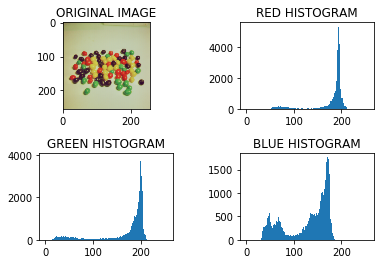

In [73]:
# HISTOGRAM USING MATPLOTLIB

r=img3[:,:,0]
g=img3[:,:,1]
b=img3[:,:,2]

plt.subplots_adjust(hspace=0.5,wspace=0.5)

plt.subplot(2,2,1)
plt.title('ORIGINAL IMAGE')
plt.imshow(img3)

plt.subplot(2,2,2)
plt.title('RED HISTOGRAM')
plt.hist(r.ravel(),bins=256,range=(0,256))

plt.subplot(2,2,3)
plt.title('GREEN HISTOGRAM')
plt.hist(g.ravel(),bins=256,range=(0,256))

plt.subplot(2,2,4)
plt.title('BLUE HISTOGRAM')
plt.hist(b.ravel(),bins=256,range=(0,256))

plt.show()
